## Maze generation algorithm
1. Depth first search
2. Recursive backtracker

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 40 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


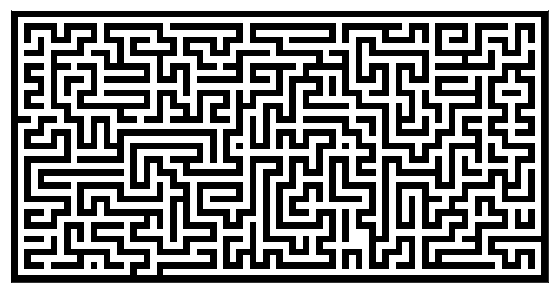

In [19]:
#This one creates loops
import numpy as np
from numpy.random import random_integers as rand
import matplotlib.pyplot as pyplot
%matplotlib inline

def maze(width=4, height=4, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = np.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(80, 40), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.savefig("maze.png")

In [20]:
#Create one step of a QRW
import pyquil
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import *

def createToffoli():
    identity = np.identity(8)
    identity[[6],[6]] = 0
    identity[[6],[7]] = 1
    identity[[7],[7]] = 0
    identity[[7],[6]] = 1
    return identity

print(createToffoli())

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]


In [21]:
#Creating a Toffoli and checking
qvm = QVMConnection()
Toffoli =  createToffoli()
prog = Program()
prog.defgate('Toffoli', Toffoli)

prog.inst(X(0),X(1))
prog.inst(('Toffoli', 0,1,2)).measure(2,2).measure(0,0).measure(1,1)
print(prog)
classical_regs  = [0,1,2]
qvm.run(prog, classical_regs)

DEFGATE Toffoli:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0
    0, 0, 0, 0, 0, 0, 1.0, 0

X 0
X 1
Toffoli 0 1 2
MEASURE 2 [2]
MEASURE 0 [0]
MEASURE 1 [1]



[[1, 1, 1]]

In [22]:
def inverseToffoli():
    identity = np.identity(8)
    identity[[0],[0]] = 0
    identity[[0],[1]] = 1
    identity[[1],[1]] = 0
    identity[[1],[0]] = 1
    return identity
invToffoli = inverseToffoli()

prog = Program()
prog.defgate('invToffoli', invToffoli)
prog.inst(('invToffoli', 0,1,2)).measure(0,0).measure(1,1).measure(2,2)
print(prog)
qvm.run(prog, classical_regs)

DEFGATE invToffoli:
    0, 1.0, 0, 0, 0, 0, 0, 0
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

invToffoli 0 1 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]



[[0, 0, 1]]

In [23]:
def controlSWAPdef():
    identity = np.identity(8)
    identity[[5],[5]] = 0
    identity[[5],[6]] = 1
    identity[[6],[6]] = 0
    identity[[6],[5]] = 1
    return identity

prog = Program()
controlSWAP = controlSWAPdef()
prog.defgate('controlSWAP', controlSWAP)
prog.inst(X(0), X(1), ('controlSWAP',0,1,2)).measure(0,0).measure(1,1).measure(2,2)
print(prog)
qvm.run(prog, classical_regs)

DEFGATE controlSWAP:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

X 0
X 1
controlSWAP 0 1 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]



[[1, 0, 1]]

In [24]:
def controlHadamard():
    identity = np.identity(4)
    identity[[2],[2]] = 1/np.sqrt(2)
    identity[[2],[3]] = 1/np.sqrt(2)
    identity[[3],[2]] = 1/np.sqrt(2)
    identity[[3],[3]] = -1/np.sqrt(2)
    return identity

controlH = controlHadamard()
prog = Program()
prog.defgate('controlH', controlH)
prog.inst(X(0), ('controlH', 0,1)).measure(0,0).measure(1,1)
reg = [0,1]
qvm.run(prog, reg, trials = 10)


[[1, 1],
 [1, 1],
 [1, 0],
 [1, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 1],
 [1, 1],
 [1, 1]]

In [25]:
def quantumRandomWalk(program):
    
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('invToffoli', 0,3,5))
    
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 1,4,6))
    
    program.inst(('Toffoli', 5,6,7))
    
    program.inst(('Toffoli', 2,7,8))
    
    program.inst(('controlSWAP', 8,4,3))
    
    program.inst(('Toffoli', 2,7,8))
    
    program.inst(('Toffoli', 5,6,7))
    
    program.inst(('invToffoli', 1,4,6))
    
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 0,3,5))
    
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('controlH', 3,4))
    
    return(program)

def quantumRandomWalk_nQubits(prog,n):
    for i in range(n-1):
        Gx = i
        Gy = n+i
        A = 2*n
        Psi_x = 2*n+1+i
        Psi_y = 3*n+1+i
        ancilla1 = 4*n+1+i
        ancilla2 = 5*n+1+i
        ancilla3 = 6*n+1+i
        ancilla4  = 7*n+1+i
        
        program.inst(('Toffoli', Gx, Psi_x, ancilla1 ))
        
        program.inst(('invToffoli', Gx, Psi_x, ancilla1))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))

        program.inst(('controlSWAP', ancilla4, Psi_x, Psi_y))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', i, Psi_x, ancilla1))
        
        program.inst(('Toffoli', i, Psi_x, ancilla1))
        
        program.inst(('controlH', Psi_x, Psi_y))
        
    return(program)

In [31]:
def defineGates(prog):
    controlH = controlHadamard()
    prog.defgate('controlH', controlH)

    controlSWAPgate = controlSWAPdef() 
    prog.defgate('controlSWAP', controlSWAPgate)

    invToffoli = inverseToffoli()
    prog.defgate('invToffoli', invToffoli)

    Toffoli =  createToffoli()
    prog.defgate('Toffoli', Toffoli)
    
    return(prog)

In [27]:
def initialise(prog):
    init_gate = np.identity(2**3)
    for i in [2,3,4,5]:
        init_gate[i,i] = 0.
    init_gate[2,3] = 1.
    init_gate[3,2] = 1.
    init_gate[4,5] = 1.
    init_gate[5,4] = 1.


    prog.defgate("INIT", init_gate)
    prog += H(0)
    prog += H(1) 
    prog.inst(("INIT",0,1,2))

    qvm = QVMConnection()
    print(qvm.wavefunction(prog))
    
    return prog
    #results = qvm.run(prog,[0,1,2],1)
    #print(results)

In [33]:
prog = Program()
prog = defineGates(prog)
prog = initialise(prog)
prog += H(4)
for i in range(3):
    prog  = quantumRandomWalk(prog)
prog.measure(4,4)
print(prog)

qubits  = [x for x in range(9)]
output = qvm.run(prog, [4], trials = 50)
print(output)
print(np.sum(output))

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>
DEFGATE controlH:
    1.0, 0, 0, 0
    0, 1.0, 0, 0
    0, 0, 0.70710678118654746, 0.70710678118654746
    0, 0, 0.70710678118654746, -0.70710678118654746

DEFGATE controlSWAP:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

DEFGATE invToffoli:
    0, 1.0, 0, 0, 0, 0, 0, 0
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

DEFGATE Toffoli:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0
    0, 0, 0, 0, 0, 0, 1.0, 0

DEFGATE INIT:
    1.0, 0,

In [29]:
from scipy import linalg
data = np.loadtxt("data3.txt")
decimal_data = np.zeros(len(data[:,0]))
decimal_data = data[:,0] * 2**4 + data[:,1] * 2**3 + data[:,2] * 2**2 + data[:,3] * 2**1 + data[:,4]
decimal_data = decimal_data.astype(int)


FileNotFoundError: [Errno 2] No such file or directory: 'data3.txt'

In [ ]:
from pyquil.latex import to_latex
p = defineGates()
p += H(0)
p += H(1)
p += H(2)
p += H(3)
qvm = QVMConnection()
print(qvm.wavefunction(p))

dict = {}
for i in range(2**4):
    if i in decimal_data:
        dict[i] = np.array([[1.,0.],[0.,1.]])
    else:
        dict[i] = np.array([[0.,1],[1.,0.]])
init_gate = linalg.block_diag(dict[0], dict[1], dict[2], dict[3], dict[4], dict[5], dict[6], dict[7], dict[8], dict[9], dict[10],
                 dict[11], dict[12], dict[13],dict[14],dict[15])

p.defgate("INIT", init_gate) 
p.inst(("INIT",0,1,2,3,4))

#p += defineGates(p)
p.inst(H(7), H(8))
for i in range(5):
    p += quantumRandomWalk_nQubits(p, 2)
p.measure(7,7).measure(8,8)
output = qvm.run(p, [7,8], trials = 50)
print(output)
print(np.sum(output,axis=0))
#print(to_latex(prog1))